### Memahami Cara Kerja Fast Fourier Transform (FFT) melalui Demonstrasi Sederhana

Sebelum kita menerapkan FFT menggunakan fungsi bawaan `numpy`, penting untuk memahami secara intuitif bagaimana FFT bekerja. FFT mengubah sinyal dari domain waktu menjadi domain frekuensi. Ini berarti FFT memecah sinyal kompleks menjadi komponen frekuensi dasarnya.

#### Contoh: Menguraikan Sinyal Sederhana ke dalam Komponen Frekuensi

Mari kita mulai dengan contoh sederhana untuk melihat bagaimana sebuah sinyal dapat diuraikan ke dalam frekuensi-frekuensi dasarnya tanpa menggunakan fungsi `fft`.

#### Langkah 1: Membuat Sinyal Sederhana

Kita akan membuat sinyal yang terdiri dari dua frekuensi sinusoidal yang berbeda, misalnya 5 Hz dan 20 Hz.

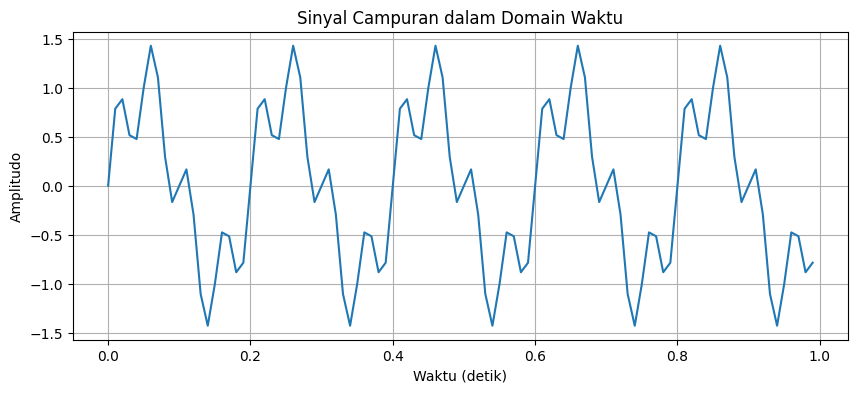

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameter
fs = 100  # Sampling rate (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector, 1 second duration

# Buat sinyal yang terdiri dari dua frekuensi sinusoidal (5 Hz dan 20 Hz)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Plot sinyal dalam domain waktu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Sinyal Campuran dalam Domain Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

**Penjelasan**:
- **Sinyal Campuran**: Sinyal ini terdiri dari dua komponen sinusoidal dengan frekuensi 5 Hz dan 20 Hz.
- **Domain Waktu**: Plot menunjukkan bagaimana sinyal berubah seiring waktu.

#### Langkah 2: Manual Transformasi ke Domain Frekuensi

Untuk memahami bagaimana FFT memecah sinyal, kita akan menghitung bagian dari transformasi ini secara manual untuk beberapa frekuensi.

In [2]:
# Hitung Fourier Transform secara manual untuk frekuensi 5 Hz dan 20 Hz
frequencies = [5, 20]  # Frekuensi yang akan kita analisis
n = len(signal)  # Jumlah sampel
transform = []

for freq in frequencies:
    # Hitung sinyal sinusoidal dengan frekuensi ini
    cos_component = np.cos(2 * np.pi * freq * t)
    sin_component = np.sin(2 * np.pi * freq * t)
    
    # Hitung dot product dengan sinyal asli (mirip dengan proyeksi)
    real_part = np.sum(signal * cos_component)
    imag_part = np.sum(signal * sin_component)
    
    # Besarnya komponen frekuensi (magnitude)
    magnitude = np.sqrt(real_part**2 + imag_part**2)
    transform.append(magnitude)

print(f'Magnitude untuk 5 Hz: {transform[0]}')
print(f'Magnitude untuk 20 Hz: {transform[1]}')

Magnitude untuk 5 Hz: 50.00000000000001
Magnitude untuk 20 Hz: 24.99999999999998


**Penjelasan**:
- **Komponen Kosinus dan Sinus**: Kita membuat gelombang sinusoidal dengan frekuensi 5 Hz dan 20 Hz dan menghitung proyeksi sinyal asli ke arah ini.
- **Magnitude**: Ini menunjukkan seberapa besar kontribusi dari masing-masing frekuensi (5 Hz dan 20 Hz) dalam sinyal asli.

#### Hasil:
Output akan menunjukkan bahwa magnitudo untuk 5 Hz lebih besar, sesuai dengan sinyal asli di mana komponen 5 Hz memiliki amplitudo yang lebih besar dibandingkan dengan 20 Hz.

#### Langkah 3: Visualisasi Manual Fourier Transform

Sekarang, mari kita lihat bagaimana komponen-komponen ini bisa digabungkan untuk menghasilkan spektrum frekuensi penuh.

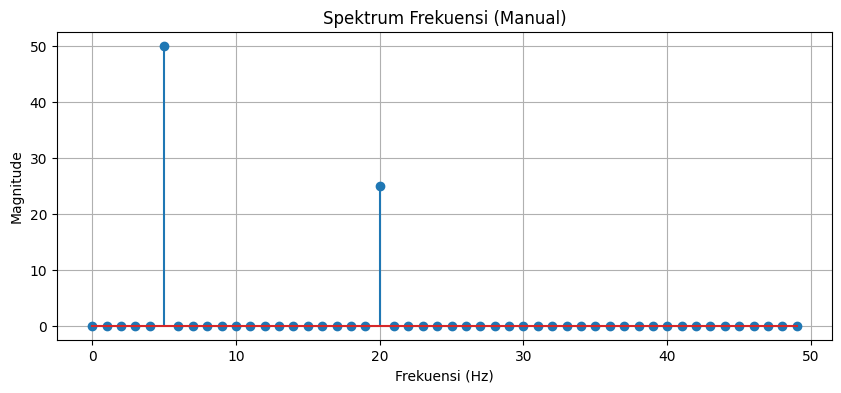

In [4]:
frequencies = np.fft.fftfreq(n, 1 / fs)
magnitudes = []

for freq in frequencies:
    cos_component = np.cos(2 * np.pi * freq * t)
    sin_component = np.sin(2 * np.pi * freq * t)
    
    real_part = np.sum(signal * cos_component)
    imag_part = np.sum(signal * sin_component)
    
    magnitude = np.sqrt(real_part**2 + imag_part**2)
    magnitudes.append(magnitude)

# Plot spektrum frekuensi
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:n // 2], magnitudes[:n // 2])
plt.title('Spektrum Frekuensi (Manual)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


**Penjelasan**:
- **Spektrum Frekuensi Manual**: Di sini, kita menghitung magnitude untuk setiap frekuensi hingga setengah dari laju sampel (frekuensi Nyquist). Hasilnya adalah spektrum frekuensi yang menunjukkan kontribusi dari setiap frekuensi dalam sinyal asli.

#### Kesimpulan

- **Transformasi Fourier Manual**: Dengan menghitung proyeksi sinyal asli ke gelombang sinusoidal pada berbagai frekuensi, kita bisa melihat bagaimana sinyal diuraikan ke dalam komponen frekuensinya.
- **FFT**: Fungsi FFT melakukan langkah-langkah ini secara otomatis dan jauh lebih efisien, terutama untuk sinyal yang lebih panjang dan kompleks.

Langkah-langkah manual ini membantu kita memahami bagaimana FFT bekerja di balik layar, dengan memproyeksikan sinyal pada berbagai frekuensi untuk menemukan kontribusi setiap frekuensi dalam sinyal tersebut.